 El siguiente es un análisis exploratorio de datos (EDA) a partir del dataset que contiene data sintetica de la demanda de efectivo en cajeros automáticos (ATMs). El objetivo del EDA es identificar patrones, correlaciones y características importantes que puedan ayudar a predecir la demanda de efectivo.

 El dataset creado atm_historical_data_with_features.csv contiene un total de 3,580 observaciones o registros. Esto corresponde a los datos generados para 10 cajeros automáticos (ATMs) durante un año completo (365 días).

### **1. Importar Librerías**

In [ ]:
# ATM Cash Demand EDA

### 1. Importar Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


###**2. Cargar y Examinar el Dataset**

In [31]:
# Cargar el dataset
df = pd.read_csv('atm_historical_data_with_features.csv')
df.head()


,Date,ATM_ID,Agency,Day_of_Week,Soles_Withdrawn,Dollars_Withdrawn,Event,Holiday,Supply_Cost_Fixed,Supply_Cost_Variable,...,Soles_Withdrawn_Lag1,Dollars_Withdrawn_Lag1,Soles_Withdrawn_Lag7,Dollars_Withdrawn_Lag7,Soles_Moving_Avg_7,Dollars_Moving_Avg_7,Total_Withdrawn,Total_Withdrawn_Lag1,Total_Withdrawn_Lag7,Total_Moving_Avg_7
0,2023-01-08,1,Agency_1,Sunday,20475,8563,Sports Event,0,56,29.04,...,25450.0,1524.0,40469.0,10437.0,26518.571429,7486.142857,29038,26974.0,50906.0,34004.714286
1,2023-01-09,1,Agency_1,Monday,29123,13394,Sports Event,1,56,42.52,...,20475.0,8563.0,34857.0,13678.0,25699.428571,7445.571429,42517,29038.0,48535.0,33145.000000
2,2023-01-10,1,Agency_1,Tuesday,15459,2175,NaN,0,56,17.63,...,29123.0,13394.0,18829.0,4531.0,25218.000000,7109.000000,17634,42517.0,23360.0,32327.000000
3,2023-01-11,1,Agency_1,Wednesday,53289,10824,Sports Event,1,56,64.11,...,15459.0,2175.0,41844.0,11107.0,26853.000000,7068.571429,64113,17634.0,52951.0,33921.571429
4,2023-01-12,1,Agency_1,Thursday,30505,3655,Festival,0,56,34.16,...,53289.0,10824.0,17652.0,6085.0,28689.142857,6721.428571,34160,64113.0,23737.0,35410.571429


In [32]:
# Información general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3580 entries, 0 to 3579
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      3580 non-null   object 
 1   ATM_ID                    3580 non-null   int64  
 2   Agency                    3580 non-null   object 
 3   Day_of_Week               3580 non-null   object 
 4   Soles_Withdrawn           3580 non-null   int64  
 5   Dollars_Withdrawn         3580 non-null   int64  
 6   Event                     2698 non-null   object 
 7   Holiday                   3580 non-null   int64  
 8   Supply_Cost_Fixed         3580 non-null   int64  
 9   Supply_Cost_Variable      3580 non-null   float64
 10  ATM_Max_Capacity_Soles    3580 non-null   int64  
 11  ATM_Max_Capacity_Dollars  3580 non-null   int64  
 12  Opportunity_Cost          3580 non-null   float64
 13  Soles_Withdrawn_Lag1      3580 non-null   float64
 14  Dollars_

In [33]:
# Resumen estadístico del dataset
df.describe()

,ATM_ID,Soles_Withdrawn,Dollars_Withdrawn,Holiday,Supply_Cost_Fixed,Supply_Cost_Variable,ATM_Max_Capacity_Soles,ATM_Max_Capacity_Dollars,Opportunity_Cost,Soles_Withdrawn_Lag1,Dollars_Withdrawn_Lag1,Soles_Withdrawn_Lag7,Dollars_Withdrawn_Lag7,Soles_Moving_Avg_7,Dollars_Moving_Avg_7,Total_Withdrawn,Total_Withdrawn_Lag1,Total_Withdrawn_Lag7,Total_Moving_Avg_7
count,3580.000000,3580.000000,3580.000000,3580.000000,3580.000000,3580.000000,3580.000000,3580.000000,3580.00000,3580.000000,3580.000000,3580.000000,3580.000000,3580.000000,3580.000000,3580.000000,3580.000000,3580.000000,3580.000000
mean,5.500000,33439.943855,10000.516201,0.503073,126.600000,43.441193,72374.100000,28480.400000,32.40252,33427.141061,9987.598045,33508.575978,9971.383240,33446.050200,9975.341101,43440.460056,43414.739106,43479.959218,43421.391301
std,2.872683,11359.259998,5181.718771,0.500060,47.789936,14.128213,12255.273587,13071.563889,12.87363,11348.729099,5179.838426,11328.534307,5187.178288,3955.190102,1765.284955,14128.087245,14114.597554,14101.911660,4782.018797
min,1.000000,5352.000000,0.000000,0.000000,55.000000,9.570000,55312.000000,10340.000000,-15.51000,5352.000000,0.000000,5352.000000,0.000000,21185.142857,5109.142857,9566.000000,9566.000000,9566.000000,27616.142857
25%,3.000000,25197.750000,6203.500000,0.000000,60.000000,32.810000,61894.000000,17296.000000,23.99000,25197.750000,6189.000000,25281.750000,6166.000000,30704.892857,8753.821429,32811.500000,32779.500000,32905.500000,40152.464286
50%,5.500000,32487.500000,9395.000000,1.000000,144.500000,42.180000,71695.500000,22534.500000,33.08000,32487.500000,9390.000000,32541.000000,9381.500000,33476.142857,9896.714286,42177.000000,42167.000000,42225.500000,43417.500000
75%,8.000000,40661.250000,13056.000000,1.000000,168.000000,52.332500,85591.000000,41368.000000,41.27000,40643.750000,13049.250000,40775.500000,13032.500000,36076.892857,11054.500000,52330.250000,52315.500000,52417.250000,46547.000000
max,10.000000,83048.000000,35228.000000,1.000000,177.000000,96.920000,91905.000000,48360.000000,66.64000,83048.000000,35228.000000,83048.000000,35228.000000,49394.000000,16426.000000,96921.000000,96921.000000,96921.000000,62707.142857


In [34]:
# Comprobar la presencia de valores nulos
print(df.isnull().sum())

Date                          0
ATM_ID                        0
Agency                        0
Day_of_Week                   0
Soles_Withdrawn               0
Dollars_Withdrawn             0
Event                       882
Holiday                       0
Supply_Cost_Fixed             0
Supply_Cost_Variable          0
ATM_Max_Capacity_Soles        0
ATM_Max_Capacity_Dollars      0
Opportunity_Cost              0
Soles_Withdrawn_Lag1          0
Dollars_Withdrawn_Lag1        0
Soles_Withdrawn_Lag7          0
Dollars_Withdrawn_Lag7        0
Soles_Moving_Avg_7            0
Dollars_Moving_Avg_7          0
Total_Withdrawn               0
Total_Withdrawn_Lag1          0
Total_Withdrawn_Lag7          0
Total_Moving_Avg_7            0
dtype: int64


In [35]:
# Get unique non-NaN event types
unique_events = df['Event'].dropna().unique()

# Create a boolean mask for NaN values
nan_mask = df['Event'].isna()

# Replace NaN values in 'Event' with random choices from unique_events
df.loc[nan_mask, 'Event'] = np.random.choice(unique_events, size=nan_mask.sum())

In [36]:
# Comprobar la presencia de valores nulos
print(df.isnull().sum())

Date                        0
ATM_ID                      0
Agency                      0
Day_of_Week                 0
Soles_Withdrawn             0
Dollars_Withdrawn           0
Event                       0
Holiday                     0
Supply_Cost_Fixed           0
Supply_Cost_Variable        0
ATM_Max_Capacity_Soles      0
ATM_Max_Capacity_Dollars    0
Opportunity_Cost            0
Soles_Withdrawn_Lag1        0
Dollars_Withdrawn_Lag1      0
Soles_Withdrawn_Lag7        0
Dollars_Withdrawn_Lag7      0
Soles_Moving_Avg_7          0
Dollars_Moving_Avg_7        0
Total_Withdrawn             0
Total_Withdrawn_Lag1        0
Total_Withdrawn_Lag7        0
Total_Moving_Avg_7          0
dtype: int64


###**3. Análisis Univariado**

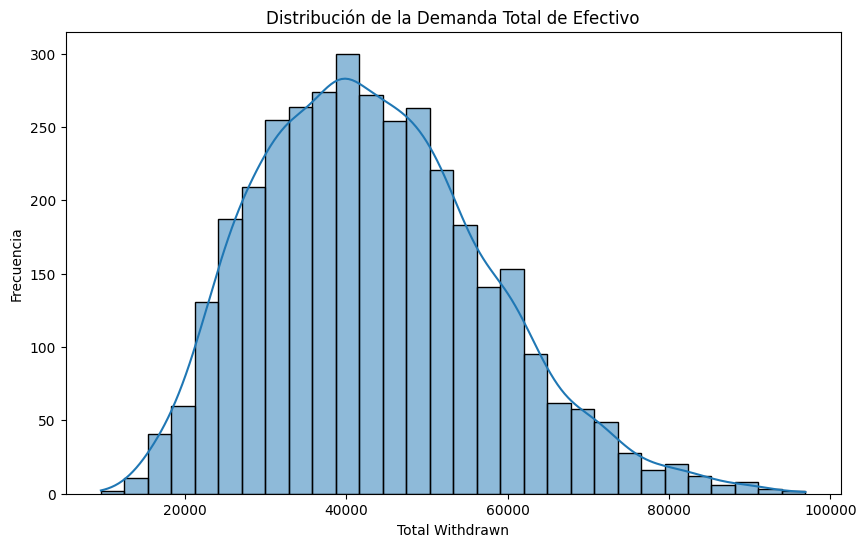

In [37]:
# Distribución de la variable objetivo (Total_Withdrawn)
plt.figure(figsize=(10, 6))
sns.histplot(df['Total_Withdrawn'], bins=30, kde=True)
plt.title('Distribución de la Demanda Total de Efectivo')
plt.xlabel('Total Withdrawn')
plt.ylabel('Frecuencia')
plt.show()


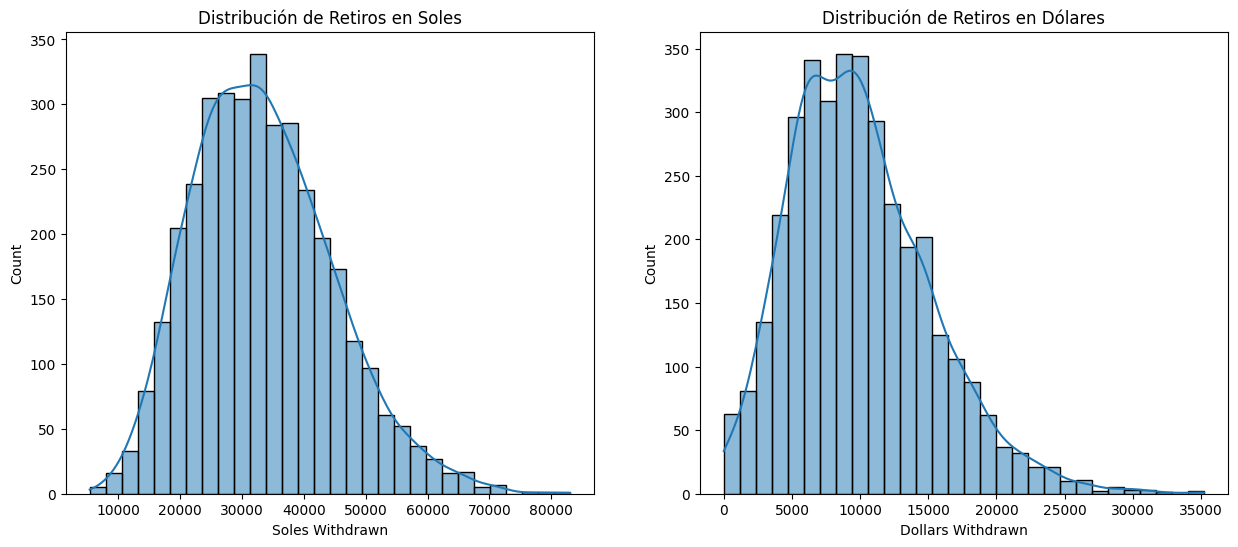

In [38]:
# Análisis de la distribución de retiros en soles y dólares
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.histplot(df['Soles_Withdrawn'], bins=30, kde=True, ax=ax[0])
ax[0].set_title('Distribución de Retiros en Soles')
ax[0].set_xlabel('Soles Withdrawn')

sns.histplot(df['Dollars_Withdrawn'], bins=30, kde=True, ax=ax[1])
ax[1].set_title('Distribución de Retiros en Dólares')
ax[1].set_xlabel('Dollars Withdrawn')

plt.show()

###**4. Análisis Bivariado**

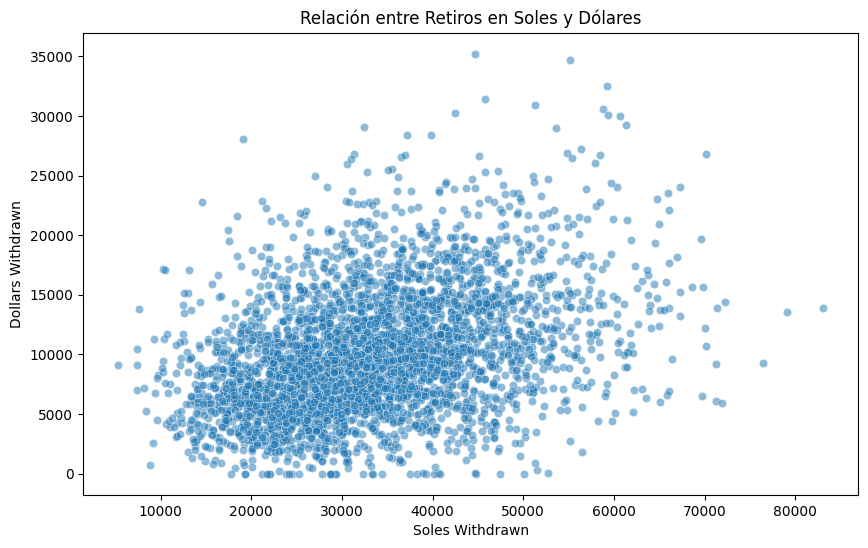

In [39]:
# Relación entre Soles y Dólares retirados
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Soles_Withdrawn', y='Dollars_Withdrawn', data=df, alpha=0.5)
plt.title('Relación entre Retiros en Soles y Dólares')
plt.xlabel('Soles Withdrawn')
plt.ylabel('Dollars Withdrawn')
plt.show()


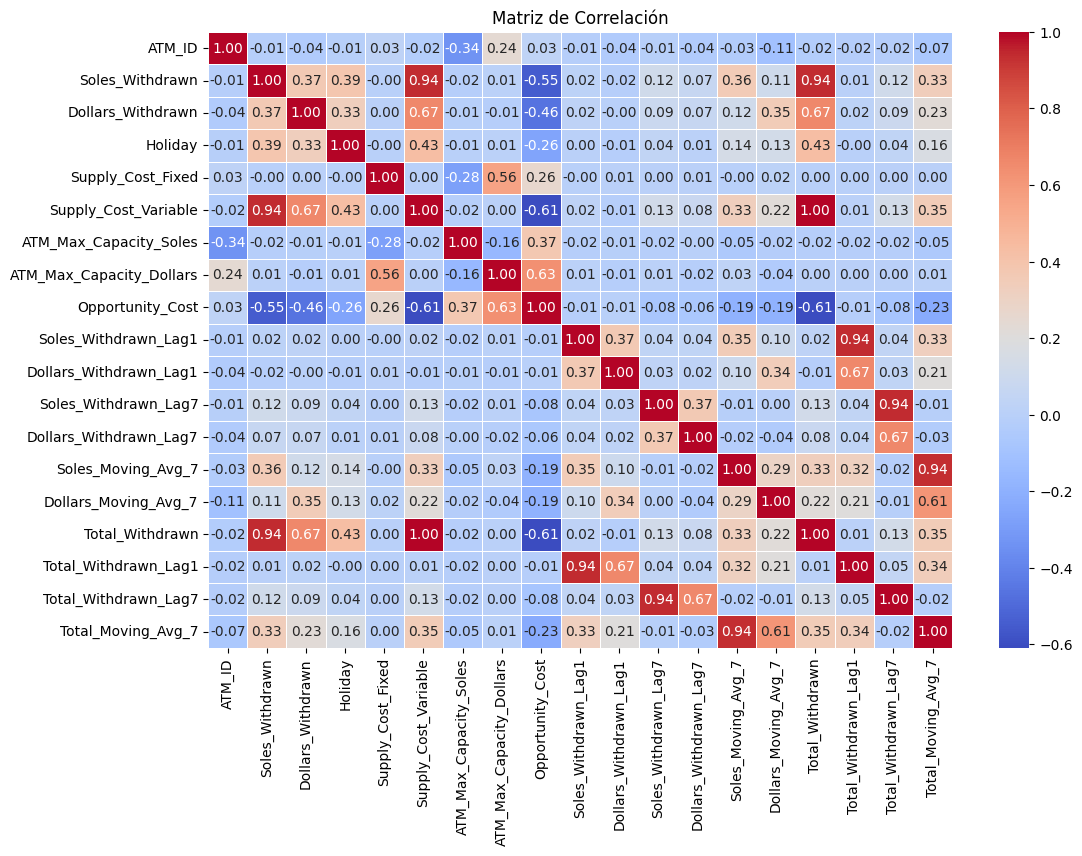

In [40]:
# Correlación entre variables numéricas
plt.figure(figsize=(12, 8))
#sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
# Seleccionar solo las columnas numericas parael calculo de la correlacion.
sns.heatmap(df.drop('Date', axis=1).select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

###**5. Análisis de Series Temporales**

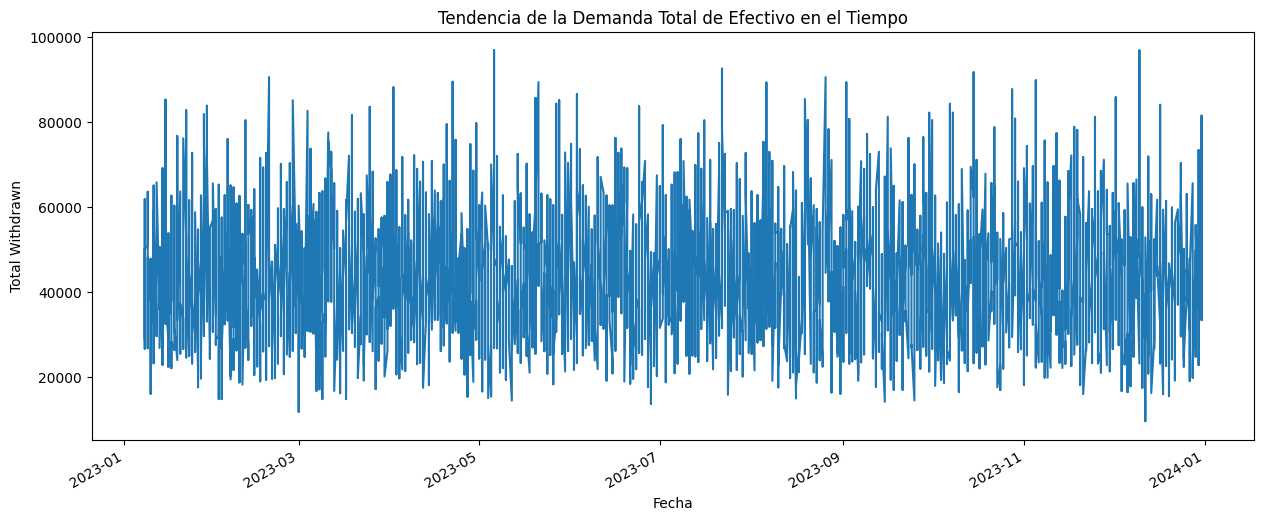

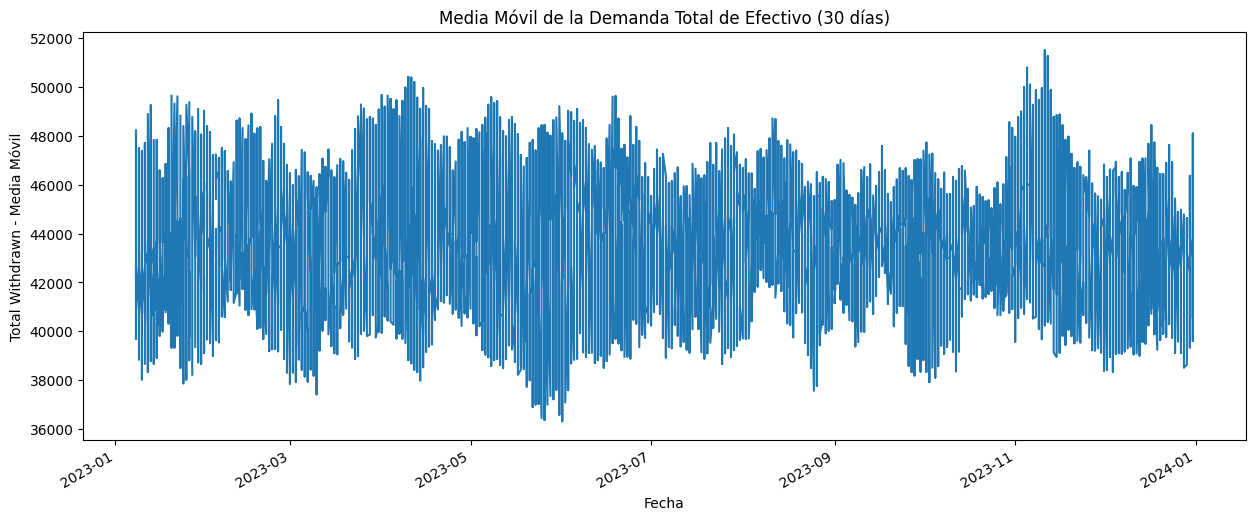

In [41]:
# Tendencia de la demanda total de efectivo a lo largo del tiempo
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

plt.figure(figsize=(15, 6))
df['Total_Withdrawn'].plot()
plt.title('Tendencia de la Demanda Total de Efectivo en el Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Total Withdrawn')
plt.show()

# Media móvil de la demanda total de efectivo
plt.figure(figsize=(15, 6))
df['Total_Withdrawn'].rolling(window=30).mean().plot()
plt.title('Media Móvil de la Demanda Total de Efectivo (30 días)')
plt.xlabel('Fecha')
plt.ylabel('Total Withdrawn - Media Móvil')
plt.show()


###**6. Análisis por Día de la Semana**

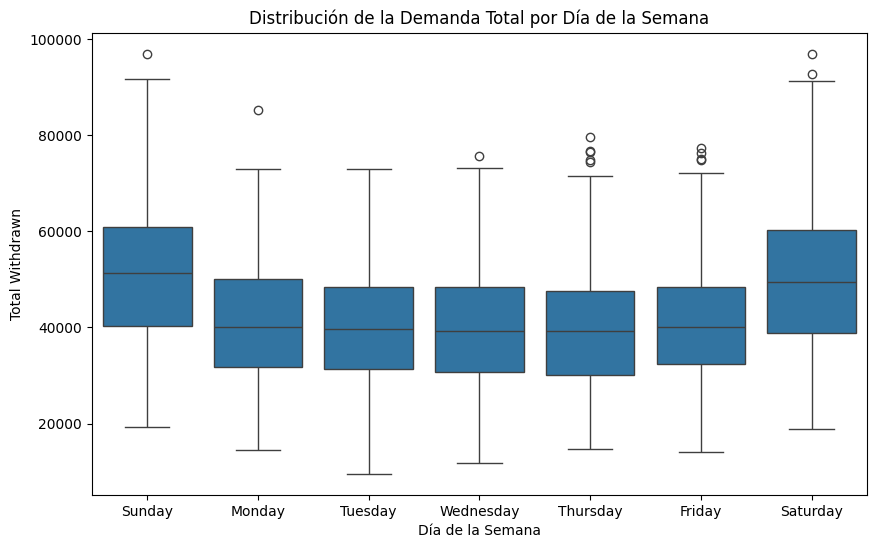

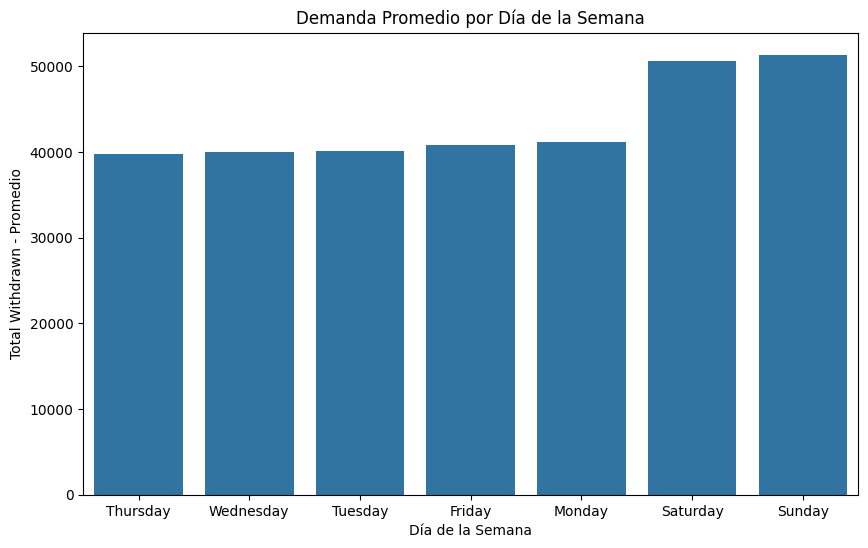

In [42]:
# Retiros promedio por día de la semana
plt.figure(figsize=(10, 6))
sns.boxplot(x='Day_of_Week', y='Total_Withdrawn', data=df)
plt.title('Distribución de la Demanda Total por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Total Withdrawn')
plt.show()

# Demanda promedio por día de la semana
weekday_avg = df.groupby('Day_of_Week')['Total_Withdrawn'].mean().sort_values()
plt.figure(figsize=(10, 6))
sns.barplot(x=weekday_avg.index, y=weekday_avg.values)
plt.title('Demanda Promedio por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Total Withdrawn - Promedio')
plt.show()


###**7. Análisis de Festivos y Eventos Especiales**

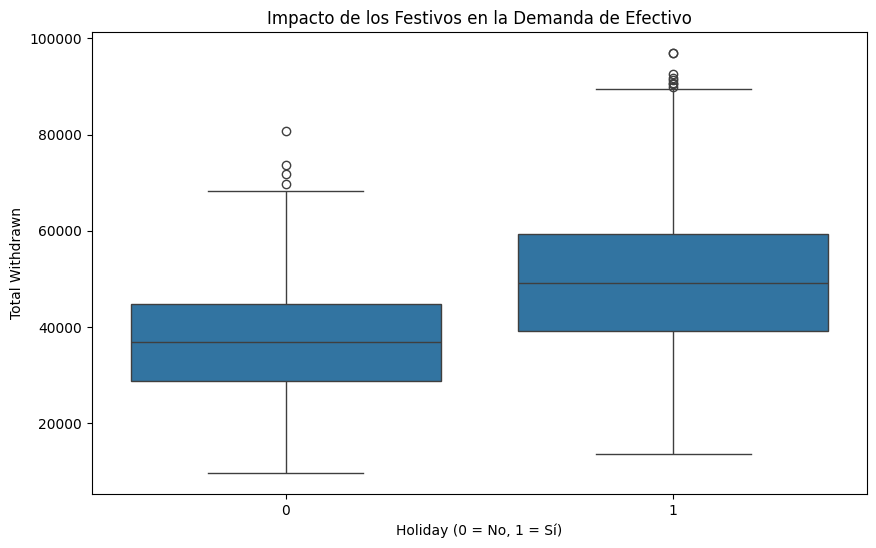

In [43]:
# Impacto de festivos en la demanda de efectivo
plt.figure(figsize=(10, 6))
sns.boxplot(x='Holiday', y='Total_Withdrawn', data=df)
plt.title('Impacto de los Festivos en la Demanda de Efectivo')
plt.xlabel('Holiday (0 = No, 1 = Sí)')
plt.ylabel('Total Withdrawn')
plt.show()

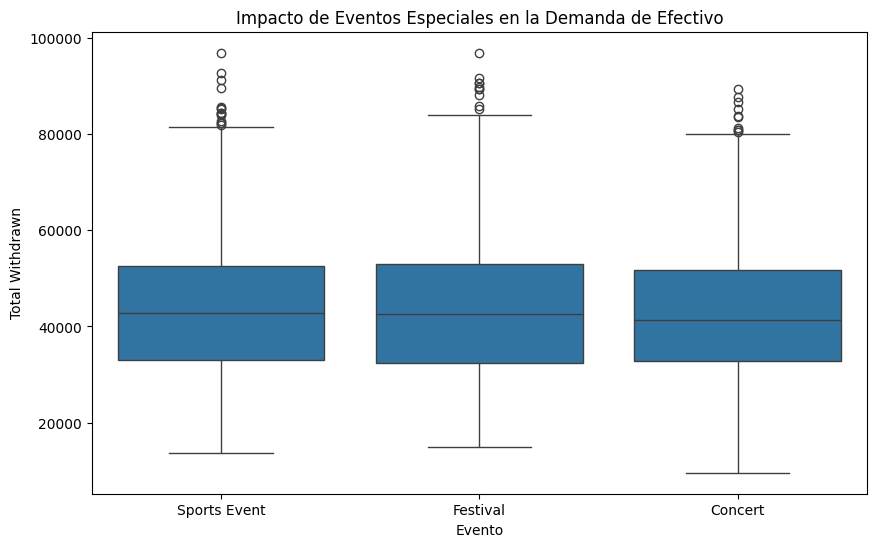

In [44]:
# Impacto de eventos especiales en la demanda de efectivo
plt.figure(figsize=(10, 6))
sns.boxplot(x='Event', y='Total_Withdrawn', data=df)
plt.title('Impacto de Eventos Especiales en la Demanda de Efectivo')
plt.xlabel('Evento')
plt.ylabel('Total Withdrawn')
plt.show()

###**8. Conclusiones y Próximos Pasos**

# Resumen de hallazgos clave

Conclusiones:
1. La demanda de efectivo muestra patrones claros según el día de la semana,
   con mayores retiros hacia el final de la semana.
2. Los festivos y eventos especiales tienen un impacto significativo en la demanda.
3. Existe una relación moderada entre los retiros en soles y dólares.

Próximos Pasos:
1. Crear nuevas características basadas en los patrones descubiertos.
2. Probar diferentes algoritmos de machine learning para la predicción de la demanda futura.
3. Realizar un análisis más profundo de las series temporales para capturar la estacionalidad.
